# ECBM E4040 - Assignment 2- Task 5: Kaggle Open-ended Competition

Kaggle is a platform for predictive modelling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data.

If you don't have a Kaggle account, feel free to join at [www.kaggle.com](https://www.kaggle.com). To let the CAs do the grading more conveniently, please __use Lionmail to join Kaggle__ and __use UNI as your username__.

The website for this competition is: 
https://www.kaggle.com/c/e4040fall2019-assignment-2-task-5

You can find detailed description about this in-class competition on the website above. Please read carefully and follow the instructions.

<span style="color:red">__TODO__:</span>
1. Train a custom model for the bottle dataset classification problem. You are free to use any methods taught in the class or found by yourself on the Internet (ALWAYS provide reference to the source) but __TF 2.0 is not allowed to use in this competition__. General training methods include:
    * Dropout
    * Batch normalization
    * Early stopping
    * l1-norm & l2-norm penalization
2. You'll be given the test set to generate your predictions (70% public + 30% private, but you don't know which ones are public/private). Achieve 70% accuracy on the public test set. The accuracy will be shown on the public leaderboard once you submit your prediction .csv file. The private leaderboard would be released after the competition. The final ranking would based on that result, not the public one.
3. 

    * Report your results on the Kaggle, for comparison with other students' optimal results (you can do this several times). 
    * Save your best model, using Github Classroom, at the same time when you submit the homework files into Courseworks. See instructions below. 

__Hint__: You can start from what you implemented in task 4. Another classic classification model named 'VGG16' can also be easily implemented.

## HW Submission Details:
There are three components to reporting the results of this task: 

**(A) Submission (up to 20 submissions each day) of the .csv prediction file throught the Kaggle platform;**. You should start doing this __VERY early__, so that students can compare their work as they are making progress with model optimization.

**(B) Editing and submitting the content of this Jupyter notebook, through Courseworks; **
(i) The code for your CNN model and for the training function. The code should be stored in __./ecbm4040/neuralnets/kaggle.py__;
(ii) Print out your training process and accuracy __within this notebook__;

**(C) Submitting your best CNN model through Github Classroom repo.**

**Description of (C):** 
For this task, we will continue to use Github classroom to save your model for submission. 

<span style="color:red">__Submission content:__ :</span>
(i) In your Assignment 2 submission folder, create a subfolder called __KaggleModel__. Upload your best model with all the data output (for example, __MODEL.data-00000-of-00001, MODEL.meta, MODEL.index__) into the folder. 
(ii) Remember to delete any intermediate results, **we only want your best model. Do not upload any data files**. The instructors will rerun the uploaded best model and verify against the score which you reported on the Kaggle.



In [58]:
# Import modules
from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import time
from matplotlib import pyplot as plt
import cv2
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# load training data
num_train = 3000
num_valid = 1000
num_label = 5
x_train = np.zeros((num_train * num_label, 128, 128, 3))
y_train = np.zeros(num_train * num_label, )
for j in range(num_label):
    y_train[0+j*num_train : (j+1)*num_train] = j
    for i in range(num_train):
        im = cv2.imread("./e4040fall2019-assignment-2-task-5/kaggle_train_128/train_128/{}/{}.png".format(str(j), str(i+j*3000)))
        x_train[i+j*num_train, :, :, :] = im
    print('load {} set finished'.format(j))
print('load training set finished')


# shuffle data
x = np.reshape(x_train, (15000, 128*128*3))
y = np.reshape(y_train, (15000, 1))
trainset = np.concatenate((x, y), axis = 1)
np.random.shuffle(trainset)
X_train = np.reshape(trainset[:,:-1], (num_train * num_label, 128, 128, 3))
Y_train = np.reshape(trainset[:,-1:], (num_train * num_label, ))
print('Shuffle training set finished')

# data preprocessing
mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_valid = X_train[num_train*num_label-num_valid:, :]
Y_valid = Y_train[num_train*num_label-num_valid:]
X_train = X_train[:num_train*num_label-num_valid:, :]
Y_train = Y_train[:num_train*num_label-num_valid]
print('Preprocess training set finished')
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_valid:', X_valid.shape)
print('Y_valid:', Y_valid.shape)

load 0 set finished
load 1 set finished
load 2 set finished
load 3 set finished
load 4 set finished
load training set finished
Shuffle training set finished
Preprocess training set finished
X_train: (14000, 128, 128, 3)
Y_train: (14000,)
X_valid: (1000, 128, 128, 3)
Y_valid: (1000,)


In [4]:
# load test data
num_test = 3500
x_test = np.zeros((num_test, 128, 128, 3))
for j in range(num_test):
    im = cv2.imread("./e4040fall2019-assignment-2-task-5/kaggle_test_128/test_128/{}.png".format(str(j)))
    x_test[j, :, :, :] = im
print('load testing set finished')


# data preprocessing
mean_image = np.mean(x_test, axis=0).astype(np.float32)
X_test = x_test.astype(np.float32) - mean_image

print('Preprocess testing set finished')
print('X_test:', X_test.shape)

load testing set finished
Preprocess testing set finished
X_test: (3500, 128, 128, 3)


In [22]:
Y_train_dummy = tf.keras.utils.to_categorical(Y_train)
Y_valid_dummy = tf.keras.utils.to_categorical(Y_valid)

## Train your model here

In [77]:
from ecbm4040.neuralnets.kaggle import my_training
tf.reset_default_graph()

result = my_training(X_train, Y_train, X_valid, Y_valid,
                conv_featmap=(6, 16),
                fc_units=(120, 84),
                conv_kernel_size=(5, 5),
                pooling_size=(2, 2),
                l2_norm=0.01,
                seed=235,
                learning_rate=1e-3,
                epoch=50,
                batch_size=295,
                verbose=False,
                pre_trained_model=None)

W1103 14:02:36.148415 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnets/kaggle.py:132: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1103 14:02:36.187072 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnets/layers.py:20: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1103 14:02:36.196259 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnets/layers.py:23: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1103 14:02:36.299834 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnet

Building example LeNet. Parameters: 
conv_featmap=(6, 16)
fc_units=(120, 84)
conv_kernel_size=(5, 5)
pooling_size=(2, 2)
l2_norm=0.01
seed=235
learning_rate=0.001


W1103 14:02:36.683836 140735795417984 deprecation.py:323] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnets/kaggle.py:72: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W1103 14:02:36.747165 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnets/kaggle.py:76: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W1103 14:02:36.753324 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnets/kaggle.py:96: The name tf.train.AdamOptimizer is de

number of batches for training: 47


W1103 14:02:37.301745 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnets/kaggle.py:157: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1103 14:02:37.317337 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnets/kaggle.py:158: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1103 14:02:37.321777 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm4040/neuralnets/kaggle.py:160: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W1103 14:02:37.478958 140735795417984 deprecation_wrapper.py:119] From /Users/runzhongzhang/Desktop/Courses/DL/Homework/HW2/e4040-2019fall-assign2-rz2431/ecbm40

epoch 1 
epoch 2 
epoch 3 
Best validation accuracy! iteration:100 accuracy: 51.7%
epoch 4 
epoch 5 
Best validation accuracy! iteration:200 accuracy: 61.6%
epoch 6 
epoch 7 
Best validation accuracy! iteration:300 accuracy: 65.6%
epoch 8 
epoch 9 
Best validation accuracy! iteration:400 accuracy: 66.5%
epoch 10 
epoch 11 
Best validation accuracy! iteration:500 accuracy: 67.9%
epoch 12 
epoch 13 
Best validation accuracy! iteration:600 accuracy: 68.4%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:800 accuracy: 69.2%
epoch 19 
epoch 20 
Best validation accuracy! iteration:900 accuracy: 70.0%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:1100 accuracy: 70.2%
epoch 25 
epoch 26 
Best validation accuracy! iteration:1200 accuracy: 71.5%
epoch 27 
epoch 28 
Best validation accuracy! iteration:1300 accuracy: 71.6%
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
Best validation accuracy! iteration:1600

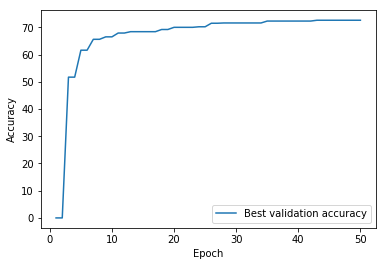

In [79]:
L = []
for i in range(50):
    L.append(i+1)
plt.plot(L, result, label = 'Best validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save your best model

In [84]:
# Already saved during last step

## Generate .csv file for Kaggle

In [80]:
# Get test result
from ecbm4040.neuralnets.kaggle import my_testing
tf.reset_default_graph()

ans = my_testing(X_test, pre_trained_model = 'lenet_1572807757')

W1103 15:41:33.895514 140735795417984 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Load the model from: lenet_1572807757
Test ends.


In [81]:
print(ans)

[1 1 2 ... 2 3 4]


In [83]:
# The following code snippet can be used to generate your prediction .csv file.

import csv
with open('predicted.csv','w') as csvfile:
    fieldnames = ['Id','label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index,l in enumerate(ans):
        filename = str(index)+'.png'
        label = str(l)
        writer.writerow({'Id': filename, 'label': label})    